## numpy & pandas 기초

In [81]:
# 한 쉘에 여러개 출력하기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
# numpy 숫자 배열 생성(1차원)
import pandas as pd
import numpy as np

v = np.array([0,1,2])
v1 = np.array([0,1,2], np.float32) # 부동소수
v2 = np.array([0.0,1.0,2.0]) # 부동소수
print(v,v1,v2)

# numpy 숫자 배열 생성(2차원)
m = np.array([[0,1,2],
             [3,4,5],
             [6,7,8]])
m1 = m.astype(np.float64) # 변수타입 변경 : 정수 -> 부동소수
print(m,m1)

# numpy 숫자 배열 생성(3차원)
t = np.array([[[0,1],[2,1],[4,1]],
             [[1,2],[3,2],[5,2]],
             [[2,3],[4,3],[6,3]]])

print(t)

[0 1 2] [0. 1. 2.] [0. 1. 2.]
[[0 1 2]
 [3 4 5]
 [6 7 8]] [[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[[[0 1]
  [2 1]
  [4 1]]

 [[1 2]
  [3 2]
  [5 2]]

 [[2 3]
  [4 3]
  [6 3]]]


In [80]:
# indexing/slicing
a = [2,3,4,7,11]
print(a[1],a[2:4],a[1:-1],a[-4:],a[:-1],a[::2],a[::-2])
# 2차원 슬라이싱 배열[행,열]
arr = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
arr[2,:]
arr[1:3,]
arr[:,3]
arr[:,:2]
arr[3,2]

3 [4, 7] [3, 4, 7] [3, 4, 7, 11] [2, 3, 4, 7] [2, 4, 11] [11, 4, 2]


array([ 9, 10, 11, 12])

array([[ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

array([ 4,  8, 12, 16])

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10],
       [13, 14]])

15

In [76]:
# ndim: 차원 확인하기
print(v.ndim, m.ndim, t.ndim)
# shape 확인
print(v.shape, m.shape, t.shape)
# 행과 열의 개수
print("rownum:", m.shape[0])
print("colnum:", m.shape[1])

1 2 3
(3,) (3, 3) (3, 3, 2)
rownum: 3
colnum: 3


In [83]:
# reshape
v.reshape(3,1)
m.reshape(1,9)
t.reshape(1,2,9)

[[0]
 [1]
 [2]]
[[0 1 2 3 4 5 6 7 8]]
[[[0 1 2 1 4 1 1 2 3]
  [2 5 2 2 3 4 3 6 3]]]


array([0, 1, 2])

In [87]:
# Broadcasting
# Array 연산은 기본적으로 동일한 matrix끼리 연산
# 연산의 크기가 달라도 Broadcast 기능으로 크기가 다른 array 연산 가능
v * 2
print(m , '+', v, '=' ,m + v)

array([0, 2, 4])

[[0 1 2]
 [3 4 5]
 [6 7 8]] + [0 1 2] = [[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]]


In [90]:
# Series : 데이터를 분석하기 위한 1차원의 데이터 자료구조
# 데이터들을 표 형태로 왼쪽엔 인덱스, 오른쪽엔 값으로 함수 안에 수를 표현함
from pandas import Series
price = [42500, 42500, 41800]
year = ["2020","2021","2022"]
# Series(index, values)
s = Series(price, year)
s
s.index
s.values

2020    42500
2021    42500
2022    41800
dtype: int64

Index(['2020', '2021', '2022'], dtype='object')

array([42500, 42500, 41800], dtype=int64)

In [91]:
# Dataframe
data = {
    'price' : [42500, 42550, 41800],
    'year' : ["2020","2021","2022"]
}
df = pd.DataFrame(data, index=data['year'])
df

,price,year
2020,42500,2020
2021,42550,2021
2022,41800,2022


In [107]:
df = pd.DataFrame({'학번':['12345','23456','34567'],
                    '성명':['홍길동','감영희','박철수'],
                    '학년':[1,2,3]})

df = df.set_index('학번')

# 특정 열 출력
df['성명']
df.성명

# 특정 행 출력
# loc , iloc : https://azanewta.tistory.com/34
# loc[행,열] / iloc[행,열]
df.iloc[1:,:]
df.loc['23456':'34567','성명':'학년']

# 특정 값
df.iloc[0,0]
df[df['학년']>1]
df[(df['학년']==2) | (df['성명']=='홍길동')] # or
df[(df['학년']==1) & (df['성명']=='홍길동')] # and
df
# 열 추가
s = pd.Series(data=[95, 75, 80], index=df.index)
df['학점'] = s
df

# 행 추가
s = pd.Series(data=['아이유','4',99], index=df.columns, name='098765')
df = df.append(s)
df


학번
12345    홍길동
23456    감영희
34567    박철수
Name: 성명, dtype: object

학번
12345    홍길동
23456    감영희
34567    박철수
Name: 성명, dtype: object

,성명,학년
학번,,
23456,감영희,2
34567,박철수,3


,성명,학년
학번,,
23456,감영희,2
34567,박철수,3


'홍길동'

,성명,학년
학번,,
23456,감영희,2
34567,박철수,3


,성명,학년
학번,,
12345,홍길동,1
23456,감영희,2


,성명,학년
학번,,
12345,홍길동,1


,성명,학년
학번,,
12345,홍길동,1
23456,감영희,2
34567,박철수,3


,성명,학년,학점
학번,,,
12345,홍길동,1,95
23456,감영희,2,75
34567,박철수,3,80


,성명,학년,학점
학번,,,
12345,홍길동,1,95
23456,감영희,2,75
34567,박철수,3,80
098765,아이유,4,99


In [121]:
# 값 변경하기
df.loc['098765','학점'] = 98
df
df.iloc[3,2] = 97
# 열 제거
df.drop("학점",axis=1)
# 행 제거
df.drop("12345",axis=0)
# rename
# inplace = True : https://www.dinolabs.ai/70
df.rename(columns={'성명':'이름'}, inplace=True)

,이름,학년,학점
학번,,,
12345,홍길동,1,95
23456,감영희,2,75
34567,박철수,3,80
098765,아이유,4,98


,이름,학년
학번,,
12345,홍길동,1
23456,감영희,2
34567,박철수,3
098765,아이유,4


,이름,학년,학점
학번,,,
23456,감영희,2,75
34567,박철수,3,80
098765,아이유,4,97


,이름,학년,학점
학번,,,
12345,홍길동,1,95
23456,감영희,2,75
34567,박철수,3,80
098765,아이유,4,97


In [127]:
# merge : 두 데이터프레임을 특정 컬럼의 값을 기준으로 데이터 병합
# df = pd.merge(df1,df2,on='기준열',how='join방식')
# 기준 열명이 상이할 경우, left_on / right_on 명시
# JOIN 방식 : left, right, inner, outer
df2 = pd.DataFrame({'학번':['12345','23456','34567','098765'],'HP':['010-1234-5678','010-1111-2222','010-0987-7654','010-2222-3333']})
df2 = df2.set_index('학번')
df_merge = pd.merge(df,df2,on="학번")
df_merge

,이름,학년,학점,HP
학번,,,,
12345,홍길동,1,95,010-1234-5678
23456,감영희,2,75,010-1111-2222
34567,박철수,3,80,010-0987-7654
098765,아이유,4,97,010-2222-3333


In [132]:
# pivot table : 인덱스, 컬럼 및 데이터를 지정하여 데이터를 재구조화
df_pivot = pd.DataFrame({'foo':['one','one','one','two','two'],
                        'bar':['A','B','C','A','B'],
                        'baz':[1,2,3,4,5],
                        'zoo':['x','q','y','w','z']})
df_pivot.pivot(index='foo',columns='bar',values='baz')

bar,A,B,C
foo,,,
one,1.0,2.0,3.0
two,4.0,5.0,NaN


## 데이터 관련 함수
* 데이터 타입 & value
  * df.shape : 데이터프레임의 형태
  * df.info() : 데이터프레임을 구성하는 컬럼과 데이터 타입 정보
  * df.nunique() : 데이터프레임 컬럼별 포함된 데이터 값의 개수
  * df.value_counts() : 특정 컬럼에 포함된 데이터 값과 그에 대한 개수
  * df.head() : 데이터 값 확인 (default : 5)
  * df.dtypes : df내의 컬럼 별 데이터 타입을 확인
* 요약통계량 확인
  * df.describe() : 각 열의 개수, 평균, 표준편차, 최소값, 최대값, 4분위수의 요약 통계량 확인
  * df.describe(include=['object']) : 범주형 데이터의 요약통계량 확인
  * df.describe(percentiles=[.30, .75, .95, .99]) : 특정 비율에 따른 요약 통계량 확인
* 결측치 확인 & 처리
  * df.isnull().sum() : pandas의 isnull(), sum() 메소드를 호출하여 df의 컬럼별 결측치 개수
  * df.fillna(0) : 값이 없는 것은 0으로 변환
  * df.replace('arg1','arg2') : 첫 번째 인자에 해당하는 문자열을 두 번째 인자 문자열로 치환
  * df.dropna() : 결측값 제거
* 집계 분석
  * df.groupby('컬럼명').count() : 개수
  * df.groupby('컬럼명').mean() : 평균
  * df.groupby('컬럼명').sum() : 합계
  * df[(df['컬럼명']==1)] : 컬럼의 값 = 1 검색



## 파일 관리
* 판다스에 정의된 read_csv/to_csv, read_excel/to_excel 함수로 csv, excel 파일을 불러오고 저장할 수 있음
  * 예시1 : df = pd.read_csv('test.csv',index_col=False)
  * 예시2 : df = pd.read_excel('test.xlsx',index_col=False)
           df.drop(index=0,axis=0,inplace=True)
* 파일 저장
  * df.to_csv('파일명',index=False)

## 타이타닉으로 실습

In [196]:
# 타이타닉 실습
import seaborn as sns
titanic = sns.load_dataset('titanic')
print(titanic.head())
print(type(titanic))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>


In [67]:
# 정보 확인하기
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [22]:
# 데이터 건수와 데이터 컬럼 수 확인하기
print(titanic.size)
print(titanic.shape)

13365
(891, 15)
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.1

In [23]:
# 수치형 데이터 컬럼의 열의 개수, 평균, 표준편차, 최소값, 최대값, 4분위수의 요약 통계량 확인
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [24]:
# 수치형 데이터의 특정 비율에 따른 요약 통계량 확인하기
print(titanic.describe(percentiles=[.30, .75, .95, .99]))

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
30%      0.000000    2.000000   22.000000    0.000000    0.000000    8.050000
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
95%      1.000000    3.000000   56.000000    3.000000    2.000000  112.079150
99%      1.000000    3.000000   65.870000    5.000000    4.000000  249.006220
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [26]:
# 범주형 데이터 컬럼의 열의 개수, unique한 값 등의 요약 통계량 확인하기
titanic.describe(include=['object'])

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [32]:
# 결측치가 있는지 확인하기 (개수 확인)
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [38]:
# 'Embarked' 필드에 어떤 데이터가 있는지 확인하기
titanic['embarked']
titanic.embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object

In [45]:
# class별 탑승객 분포 확인하기
titanic.groupby('pclass').sum()

,survived,age,sibsp,parch,fare,adult_male,alone
pclass,,,,,,,
1,136,7111.42,90,77,18177.4125,119,109
2,87,5168.83,74,70,3801.8417,99,104
3,119,8924.92,302,193,6714.6951,319,324


In [55]:
# 생존 인원수 확인하기
titanic['survived'][titanic['survived']==1].count()

342

In [66]:
# 각 클래스 별 생존 인원수 확인하기
survived = titanic[titanic['survived']==1]
survived[['pclass','survived']].groupby('pclass').count()

,survived
pclass,
1,136
2,87
3,119


In [139]:
# 동일한 의미를 포함하는 컬럼 삭제하기
titanic.drop(['class','who','embark_town','alive'],axis=1,inplace=True)

In [146]:
# 결측치 확인하기
titanic.isnull().sum()
# embarked 필드의 결측치는 'S'로 변경하기
titanic['embarked'] = titanic['embarked'].fillna('S')
# 결측값 잘 들어갔나 확인하기
titanic['embarked'].isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

0

In [152]:
# 결측치가 많은 deck 지우기
titanic.drop('deck',axis=1,inplace=True)
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [173]:
# age의 결측치는 해당 행 삭제
# 1
age_null = titanic[titanic['age'].isnull()].index
titanic.drop(age_null,inplace=True)
# 2
titanic = titanic.dropna(subset=['age'])

# 맞게 삭제됐나 확인
titanic.shape

(714, 15)

In [174]:
# age를 그룹핑하여 'AgeGroup' 생성하여 할당하기
bin = [0,18,25,35,60,100]
group_names = ['Baby','Youth','YoungAdult','MiddleAged','Senior']
titanic['AgeGroup'] = pd.cut(titanic['age'], bins=bin, labels=group_names)
titanic['AgeGroup'].value_counts()

YoungAdult    196
MiddleAged    195
Youth         162
Baby          139
Senior         22
Name: AgeGroup, dtype: int64

In [176]:
# 탑승한 형제자매수(sibsp), 부모님수(parch) 합하여 가족수(family_size) 컬럼 추가 하고,
# 가족수가 1이면 혼자 탑승 여부를 1로 정의하기
titanic['family_size'] = titanic['parch'] + titanic['sibsp']
titanic['alone'] = 0
titanic.loc[titanic.family_size==0,'alone'] = 1
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,AgeGroup,family_size
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,0,Youth,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,0,MiddleAged,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,1,YoungAdult,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,0,YoungAdult,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,1,YoungAdult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,0,MiddleAged,5
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,1,YoungAdult,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,1,Youth,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,1,YoungAdult,0


## 시각화

<AxesSubplot:xlabel='age', ylabel='Count'>

<AxesSubplot:xlabel='age', ylabel='Count'>

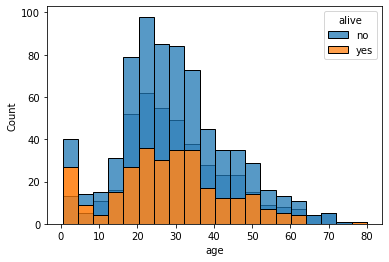

In [181]:
# 1. 히스토그램(histogram)
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")

# x는 시각화 기준값, bin은 구간의 개수, binwidth는 등급폭
sns.histplot(data = titanic[(titanic['survived']==1)],x='age',bins=8,binwidth=3)

# hue 그룹핑, multiple='stack' 누적
sns.histplot(data=titanic, x='age', hue='alive')
sns.histplot(data=titanic, x='age', hue='alive', multiple='stack')

plt.show()


<AxesSubplot:xlabel='fare', ylabel='Density'>

<AxesSubplot:xlabel='fare', ylabel='Count'>

Text(0.5, 1.0, 'titanic fare - kdeplot')

Text(0.5, 1.0, 'titanic fare - histplot')

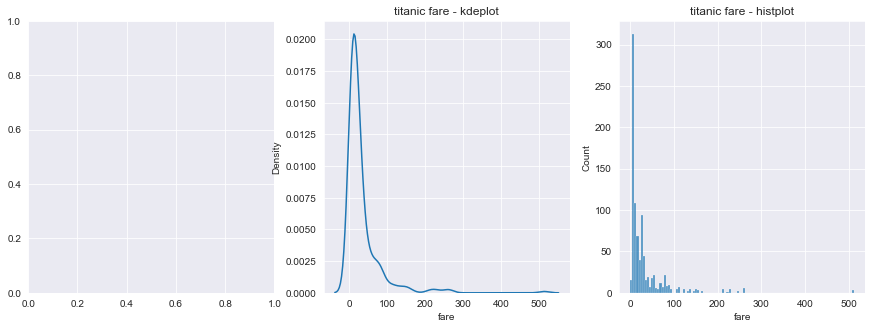

In [184]:
# 분포도
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# sns.distplot(titanic['fare'],ax=ax1)
sns.kdeplot(x='fare',data=titanic,ax=ax2)
sns.histplot(x='fare',data=titanic,ax=ax3)

# 차트 제목 표시
# ax1.set_title('titanic fare - distplot')
ax2.set_title('titanic fare - kdeplot')
ax3.set_title('titanic fare - histplot')



<AxesSubplot:xlabel='fare', ylabel='age'>

<AxesSubplot:xlabel='fare', ylabel='age'>

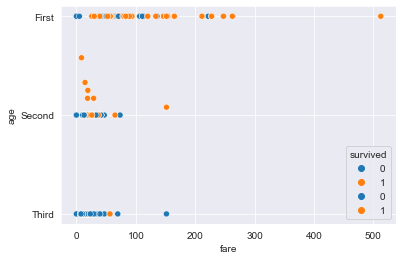

In [186]:
# 산점도
sns.scatterplot(x='fare',y='age',hue='survived',data=titanic)
sns.scatterplot(x='fare',y='class',hue='survived',data=titanic)


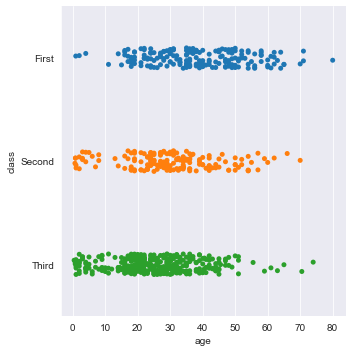

In [187]:
# 점그래프
sns.catplot(x="age",y="class",data=titanic)
plt.show()

<AxesSubplot:xlabel='sex', ylabel='survived'>

<AxesSubplot:xlabel='survived', ylabel='sex'>

<AxesSubplot:xlabel='sex', ylabel='survived'>

<AxesSubplot:xlabel='sex', ylabel='survived'>

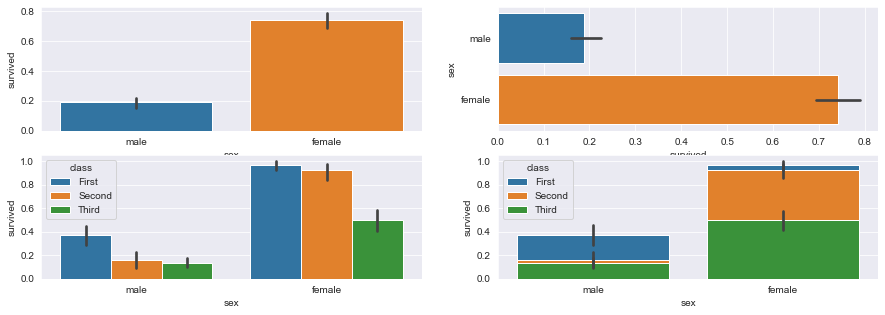

In [188]:
# 막대 그래프 & 누적 막대 그래프
## 스타일 테마 설정 (darkgrid, whitegrid, dark, white, ticks)

# 그래프 객체 새성
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
sns.barplot(y='sex', x='survived', data=titanic, ax=ax2)

# x,y 축에 변수 할당하고 hue 옵션 추가
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax3)

# x,y 축에 변수 할당하고 hue 옵션 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax4)


<AxesSubplot:xlabel='class', ylabel='age'>

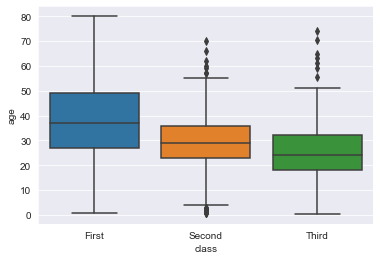

In [189]:
# 박스플롯
sns.boxplot(x='class', y='age', data=titanic)

<AxesSubplot:xlabel='class', ylabel='age'>

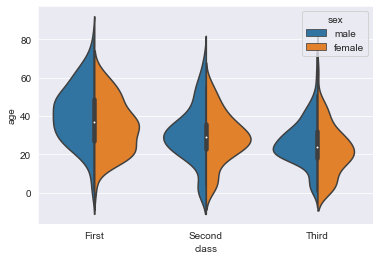

In [190]:
# 바이올린플롯
sns.violinplot(x='class',y='age',hue='sex',data=titanic,split=True)

<AxesSubplot:xlabel='class', ylabel='count'>

<AxesSubplot:xlabel='count', ylabel='class'>

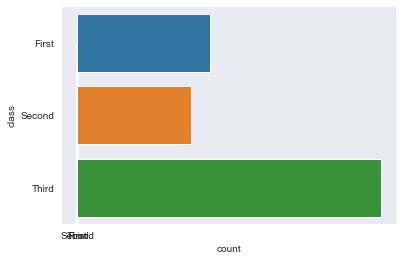

In [192]:
# 카운트플롯
sns.countplot(x='class',data=titanic)
sns.countplot(y='class',data=titanic)


([<matplotlib.patches.Wedge at 0x2094b959c10>,
 [Text(1.0461621663333946, 0.3399186987098808, 'A'),
  Text(-0.8899187482945419, 0.6465637025335369, 'B'),
  Text(0.6465639524941308, -0.8899185666875186, 'C')],
 [Text(0.5706339089091244, 0.1854101992962986, '10.0%'),
  Text(-0.4854102263424773, 0.3526711104728383, '60.0%'),
  Text(0.35267124681498035, -0.485410127284101, '30.0%')])

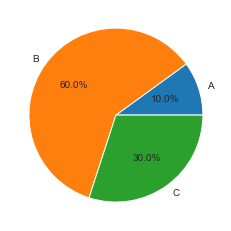

In [193]:
# 파이차트
x = [10, 60, 30]
labels = ['A','B','C'] # 범주형 데이터 레이블

plt.pie(x=x, labels=labels, autopct='%.1f%%')

(<Figure size 576x432 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:>

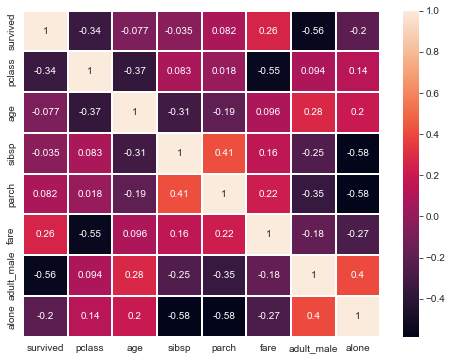

In [194]:
# 히트맵
plt.subplots(figsize=(8,6))
sns.heatmap(titanic.corr(), annot=True, linewidths=2)

<AxesSubplot:xlabel='class', ylabel='sex'>

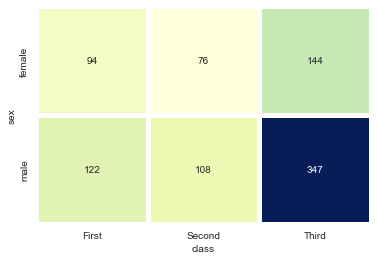

In [199]:
# 히트맵2
tb = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
sns.heatmap(tb,
            annot=True, fmt='d',
            cmap='YlGnBu',
            linewidth=5,
            cbar=False)

<AxesSubplot:xlabel='year', ylabel='passengers'>

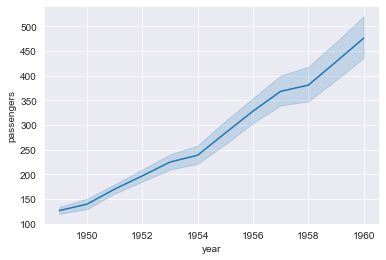

In [200]:
# 라인플롯
flights = sns.load_dataset('flights')
sns.lineplot(x='year', y='passengers', data=flights)